<a href="https://colab.research.google.com/github/SarahFeanor/Portfolio-DataScience/blob/main/A%C3%A7%C3%B5es_do_Google_com_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<sub> 🔗[GitHub](https://github.com/SarahFeanor) | [LinkedIn](https://www.linkedin.com/in/sarahfrezende/) | [Portfólio](https://github.com/sarahfeanor/Portfolio-DataScience) | [Medium](https://medium.com/@sarahfrezende)  </sub>

<sup> 📂 Projeto | Data Science | By Sarah Faria Rezende </sup>

---

# **Previsão das Variações das Ações da Google Utilizando a Regressão Linear para Maximizar Investimentos** 📈

A Google, fundada em 1998, é uma empresa líder em tecnologia globalmente reconhecida. Inicialmente conhecida por seu mecanismo de busca, expandiu-se para uma ampla gama de produtos e serviços, incluindo Android, YouTube, Google Maps e Gmail. Seu papel na pesquisa em inteligência artificial e aprendizado de máquina resultou em avanços como o Google Assistant. Sob a holding Alphabet Inc., a Google continua a impulsionar a inovação em diversas áreas, influenciando profundamente a maneira como interagimos com a tecnologia e o mundo online.

📊 Neste projeto, propomos empregar técnicas avançadas de análise, especificamente a **regressão linear**, para realizar **previsões** precisas das variações nas ações da **Google**. O principal propósito é auxiliar investidores a tomar decisões informadas e maximizar seus retornos financeiros. Ao aplicar a regressão linear aos dados históricos das ações da **Google**, iremos modelar as tendências e os padrões que podem influenciar os movimentos futuros do mercado.

A análise das ações da Google envolve um estudo profundo das flutuações de preços, considerando fatores como indicadores econômicos, eventos do setor de tecnologia, bem como notícias globais que impactam a empresa. Ao identificar correlações significativas entre esses fatores e o comportamento das ações, seremos capazes de criar um modelo preditivo confiável.

Com o objetivo de fornecer uma ferramenta valiosa aos investidores, vamos não apenas focar em prever os melhores momentos para comprar ou vender ações da Google, mas também em avaliar o risco associado a essas decisões. Compreender as incertezas envolvidas é crucial para uma estratégia de investimento sólida e bem-sucedida.

Este projeto é uma tentativa de combinar análise de dados, conhecimento financeiro e tecnologia para proporcionar insights acionáveis aos investidores interessados em ações da Google. Ao adotar abordagens inovadoras e empregar ferramentas estatísticas avançadas, buscamos capacitar os investidores a tomarem decisões informadas e, potencialmente, obterem vantagens competitivas nos mercados financeiros em constante evolução.


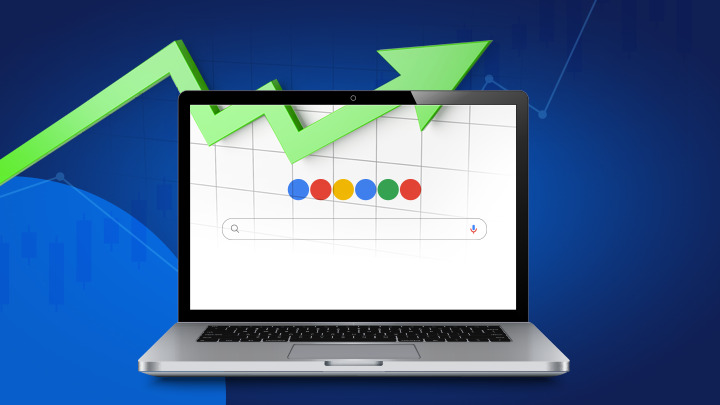


# 📍 **OBJETIVO**:
Utilizar a Regressão Linear para Prever as Melhores Oportunidades de Investimento nas Ações da Google

Vamos criar um modelo para prever como as ações da Google vão mudar ao longo do tempo e maximizar nossos investimentos. Aqui está o plano simplificado:

* **Preparar os Dados**:
   - Pegar os registros passados das ações da Google, incluindo detalhes como "Data", "Abertura", "Fechamento", "Alta", "Baixa", "Volume", etc.
   - Calcular a diferença diária entre o preço de fechamento e abertura, chamada de "variação diária".

*  **Analisar os Dados**:
   - Dar uma olhada nos dados para entender tendências, padrões e mudanças sazonais.
   - Ver como as diferentes informações se relacionam, incluindo a variação diária e outros números.

* **Preparar os Conjuntos de Dados para Treino e Teste**:
   - Dividir os dados em dois grupos: um para treinar o modelo e outro para testá-lo. Por exemplo, usar dados antigos para treino e dados recentes para teste.

* **Construir um Modelo de Regressão Linear**:
   - Usar uma ferramenta de aprendizado de máquina, como o Scikit-Learn.
   - Decidir quais detalhes devem ser usados para prever as mudanças das ações. Pode ser só o preço de abertura ou outros, como o volume ou os preços altos/baixos.
   - Ensinar o modelo a partir dos dados de treino.

* **Avaliar o Modelo**:
   - Testar o modelo usando os dados de teste.
   - Calcular coisas como o quanto ele erra em média (MAE), como os erros se acumulam (MSE) e o quão bem ele se encaixa nos dados (R²).
   - Ver se o modelo está fazendo previsões sensatas.

* **Fazer Previsões e Investir**:
   - Usar o modelo treinado para imaginar como as ações vão mudar em algum tempo no futuro.
   - Com base nessas imaginações, criar um plano de investimento que possa dar mais dinheiro. Isso pode envolver comprar/vender ações ou outras coisas, dependendo das previsões.

* **Acompanhar e Mudar**:
   - Olhar como o modelo se sai comparado ao que realmente acontece.
   - Fazer ajustes no modelo se ele não estiver prevendo bem.

* **Lembrar**:
   - Saber que a regressão linear é uma forma simples de olhar isso e o mercado de ações é complicado, sendo influenciado por muitas coisas.
   - Usar outras maneiras avançadas, como pensar no tempo, entender sentimentos das pessoas, etc., para fazer previsões melhores.

Lembrar sempre que acertar no mercado de ações é difícil e pode ser arriscado. É bom estudar muito e ouvir quem entende antes de fazer decisões sobre investir.

# **1 - PREPARAÇÃO DOS DADOS**



## **Importando dados e pacotes necessários**

In [50]:
# Importando pacotes necessários
import pandas as pd
import numpy as np

import math #fornece funções matemáticas e constantes
import random #permitindo a geração de números aleatórios
import datetime #lida com datas e horários

import seaborn as sns # usado para visualização de dados
import matplotlib.pyplot as plt # para criar gráficos
plt.style.use('seaborn-whitegrid') # estilo de plotagem dos gráficos

# para obter dados financeiros de fontes externas
import pandas_datareader as data_reader

# para verificar a igualdade de objetos DataFrame
from pandas.util.testing import assert_frame_equal


<ipython-input-50-35bbf34fb344>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid') # estilo de plotagem dos gráficos


In [1]:
# Essa função permite obter a versão da linguagem Python em uso
from platform import python_version
print('Versão python neste Notebook:', python_version())


Versão python neste Notebook: 3.10.12


In [3]:
!pip install yfinance


## **Carregando Dados**

* O código a seguir utiliza a biblioteca **yfinance** para adquirir informações sobre as ações da **Google** dentro do intervalo de datas definido.
* Uma vez que tenhamos carregado os dados históricos das ações da Google, calcularemos a variação diária das ações e adicionaremos uma coluna "Variation" ao DataFrame df. Isso nos dará uma base sólida para continuar com a análise e construção do modelo de regressão linear.




In [29]:
# Carregar os dados históricos das ações da Google usando yfinance
ticker = "GOOG"
start_date = "2010-01-01"
end_date = "2023-08-31"
df = yf.download(ticker, start=start_date, end=end_date)

# Calcular a variação diária das ações (Diferença entre o preço de fechamento e abertura)
df["Variation"] = df["Close"] - df["Open"]

# Exibir as primeiras linhas do DataFrame resultante
print(df.head())

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2010-01-04  15.615220  15.678981  15.547723  15.610239  15.610239   78541293   
2010-01-05  15.620949  15.637387  15.480475  15.541497  15.541497  120638494   
2010-01-06  15.588072  15.588072  15.102393  15.149715  15.149715  159744526   
2010-01-07  15.178109  15.193053  14.760922  14.797037  14.797037  257533695   
2010-01-08  14.744733  15.024933  14.672753  14.994298  14.994298  189680313   

            Variation  
Date                   
2010-01-04  -0.004981  
2010-01-05  -0.079452  
2010-01-06  -0.438356  
2010-01-07  -0.381072  
2010-01-08   0.249565  


## **Análise dos Dados**

Esta fase visa proporcionar uma compreensão profunda da estrutura dos dados, permitindo um discernimento mais claro sobre suas características e padrões.

* Vamos exibir os primeiros registros desse conjunto de dados. Isso nos proporcionará um ponto de partida inicial para examinar as flutuações nos preços das ações ao longo do período selecionado. Essa visualização inicial é valiosa para obter uma rápida visão das tendências nas avaliações das ações ao longo desse intervalo específico.

In [38]:
#Imprimindo as 5 primeiras linhas
df.head()

,Open,High,Low,Close,Adj Close,Volume,Variation
Date,,,,,,,
2010-01-04,15.615220,15.678981,15.547723,15.610239,15.610239,78541293,-0.004981
2010-01-05,15.620949,15.637387,15.480475,15.541497,15.541497,120638494,-0.079452
2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526,-0.438356
2010-01-07,15.178109,15.193053,14.760922,14.797037,14.797037,257533695,-0.381072
2010-01-08,14.744733,15.024933,14.672753,14.994298,14.994298,189680313,0.249565


In [39]:
# Extrair o nome das colunas
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Variation'], dtype='object')

## **Dicionario de variaveis**

Essas são colunas (variáveis) presentes no DataFrame resultante após a aquisição dos dados das ações da Google.

* `Open`: Refere-se ao **preço de abertura das ações** da Google no início de um determinado período (geralmente, um dia de negociação). Esse é o valor pelo qual a primeira transação foi realizada no mercado de ações no início desse período.

* `High:` Representa o **preço mais alto** alcançado pelas ações da Google durante o mesmo período. Indica o preço máximo que as ações atingiram ao longo do dia de negociação.

* `Low`: Indica o `preço mais baixo` ao qual as ações da Google foram negociadas durante o mesmo período. Mostra o valor mínimo que as ações atingiram durante o dia.

* `Close`: Refere-se ao **preço de fechamento das ações** da Google no final do período em questão. Esse é o valor pelo qual a última transação foi realizada no mercado de ações no final do período.

* `Adj Close`: O **preço ajustado** (ajustado) de fechamento leva em consideração fatores como dividendos e desdobramentos de ações que podem afetar o preço ao longo do tempo. É um preço mais preciso para análises de longo prazo.

* `Volume`: Indica o `número total de ações` da Google negociadas durante o período. Essa coluna mostra a quantidade de ações que foram compradas e vendidas durante o dia.

* `Date`: Representa as **datas correspondentes** às informações nas outras colunas. Cada linha do DataFrame está associada a uma data específica em que as informações de preços e volume foram registradas.

Juntas, essas colunas fornecem informações essenciais para avaliar o desempenho das ações da Google ao longo do tempo, permitindo análises de tendências, volatilidade e outros padrões no mercado de ações.

In [40]:
#Imprimindos a dimensão das linhas e variáveis da base de dados
print("Quantidade de dados: ", df.shape[0])
print("Quantidade de variáveis: ", df.shape[1])

Quantidade de dados:  3436
Quantidade de variáveis:  7


In [41]:
# informações gerais sobre um DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3436 entries, 2010-01-04 to 2023-08-28
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3436 non-null   float64
 1   High       3436 non-null   float64
 2   Low        3436 non-null   float64
 3   Close      3436 non-null   float64
 4   Adj Close  3436 non-null   float64
 5   Volume     3436 non-null   int64  
 6   Variation  3436 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 214.8 KB


In [42]:
# Porcentagem de item nulo
round(df.isnull().sum()/df.shape[0] * 100, 2).sort_values(ascending = False)

Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
Variation    0.0
dtype: float64

In [43]:
# verificando o tipo das variaveis
df.dtypes


Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
Variation    float64
dtype: object

A análise acima indica que as colunas relacionadas aos preços das ações (`Open, High, Low, Close, Adj Close`) são armazenadas como valores numéricos de ponto flutuante, enquanto a coluna `Volume` é armazenada como valores inteiros, o que é consistente com a natureza das informações financeiras.

# **2 - ANÁLISE EXPLORATÓRIA DE DADOS**



Essa etapa de análise e exploração dos dados é crucial para entender as nuances dos dados e identificar possíveis padrões e relações. Isso ajudará você a tomar decisões informadas ao construir seu modelo de regressão linear e, posteriormente, ao desenvolver estratégias de investimento baseadas nas previsões.

* Visualize os dados para compreender tendências, sazonalidades e padrões.
* Verifique a correlação entre variáveis, incluindo variação diária e outras métricas.
* Use gráficos de linhas para mostrar variações ao longo do tempo e identificar tendências.
* Procure por padrões sazonais e eventos especiais nos gráficos.
* Calcule a matriz de correlação e crie um mapa de calor para entender as relações entre métricas.



 **Preços das Ações da Google** 📈

A seguir, faremos uma análise visual dos dos **Preços de Abertura, Fechamento, Alta e Baixa  das ações da Google** ao longo do tempo, por meio de um **gráfico de linha**. Esse gráfico nos permitirá identificar tendências de crescimento ou queda nos preços máximos das ações, contribuindo para uma compreensão mais profunda dos padrões de variação ao longo do período em análise.

*Gráficos de Linhas dos Preços de Abertura, Fechamento, Alta e Baixa ao Longo do Tempo:*


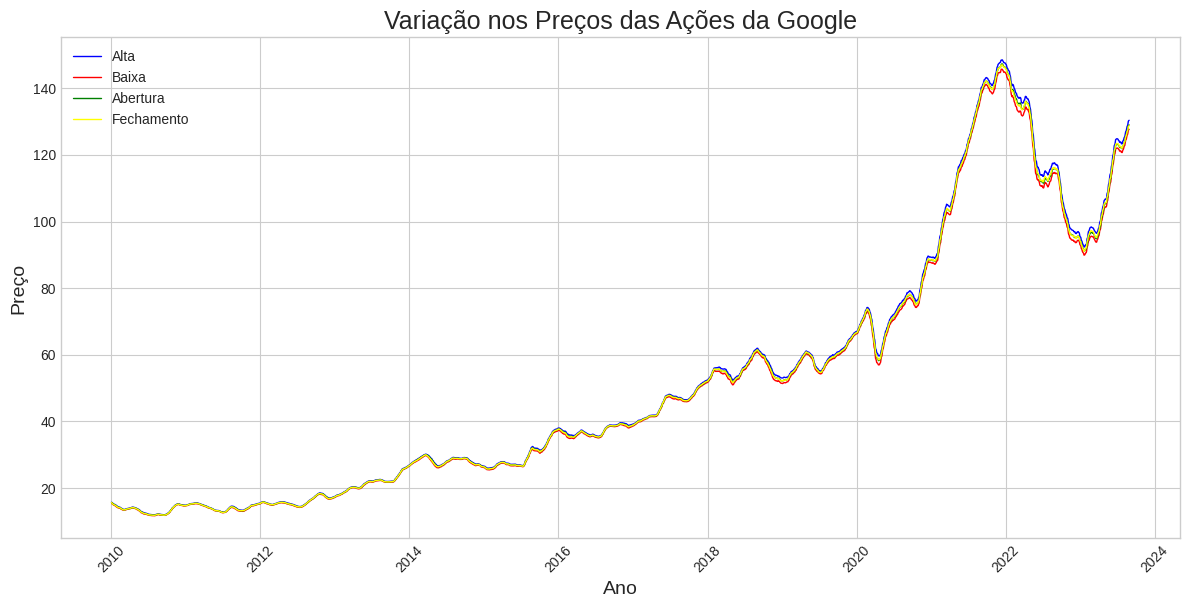

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Define o tamanho da figura do gráfico

# Calcular a média móvel para suavizar as linhas
rolling_window = 30  # Tamanho da janela de média móvel
smoothed_high = df["High"].rolling(window=rolling_window, min_periods=1).mean()
smoothed_low = df["Low"].rolling(window=rolling_window, min_periods=1).mean()
smoothed_open = df["Open"].rolling(window=rolling_window, min_periods=1).mean()
smoothed_close = df["Close"].rolling(window=rolling_window, min_periods=1).mean()

plt.plot(smoothed_high, color='blue', label='Alta', linewidth=1)
plt.plot(smoothed_low, color='red', label='Baixa', linewidth=1)
plt.plot(smoothed_open, color='green', label='Abertura', linewidth=1)
plt.plot(smoothed_close, color='yellow', label='Fechamento', linewidth=1)

plt.title("Variação nos Preços das Ações da Google", fontsize=18)  # Título do gráfico
plt.xlabel("Ano", fontsize=14)  # Rótulo do eixo x
plt.ylabel("Preço", fontsize=14)  # Rótulo do eixo y

plt.legend()  # Mostra a legenda no gráfico

plt.tight_layout()  # Melhora o espaçamento dos elementos no gráfico
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade

plt.show()  # Exibe o gráfico plotado


Agora vamos plotar um histograma de distribuição para visualizar a frequência dos valores de volume de negociação das ações da Google.

<ipython-input-47-2d35607ef859>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df["Volume"])


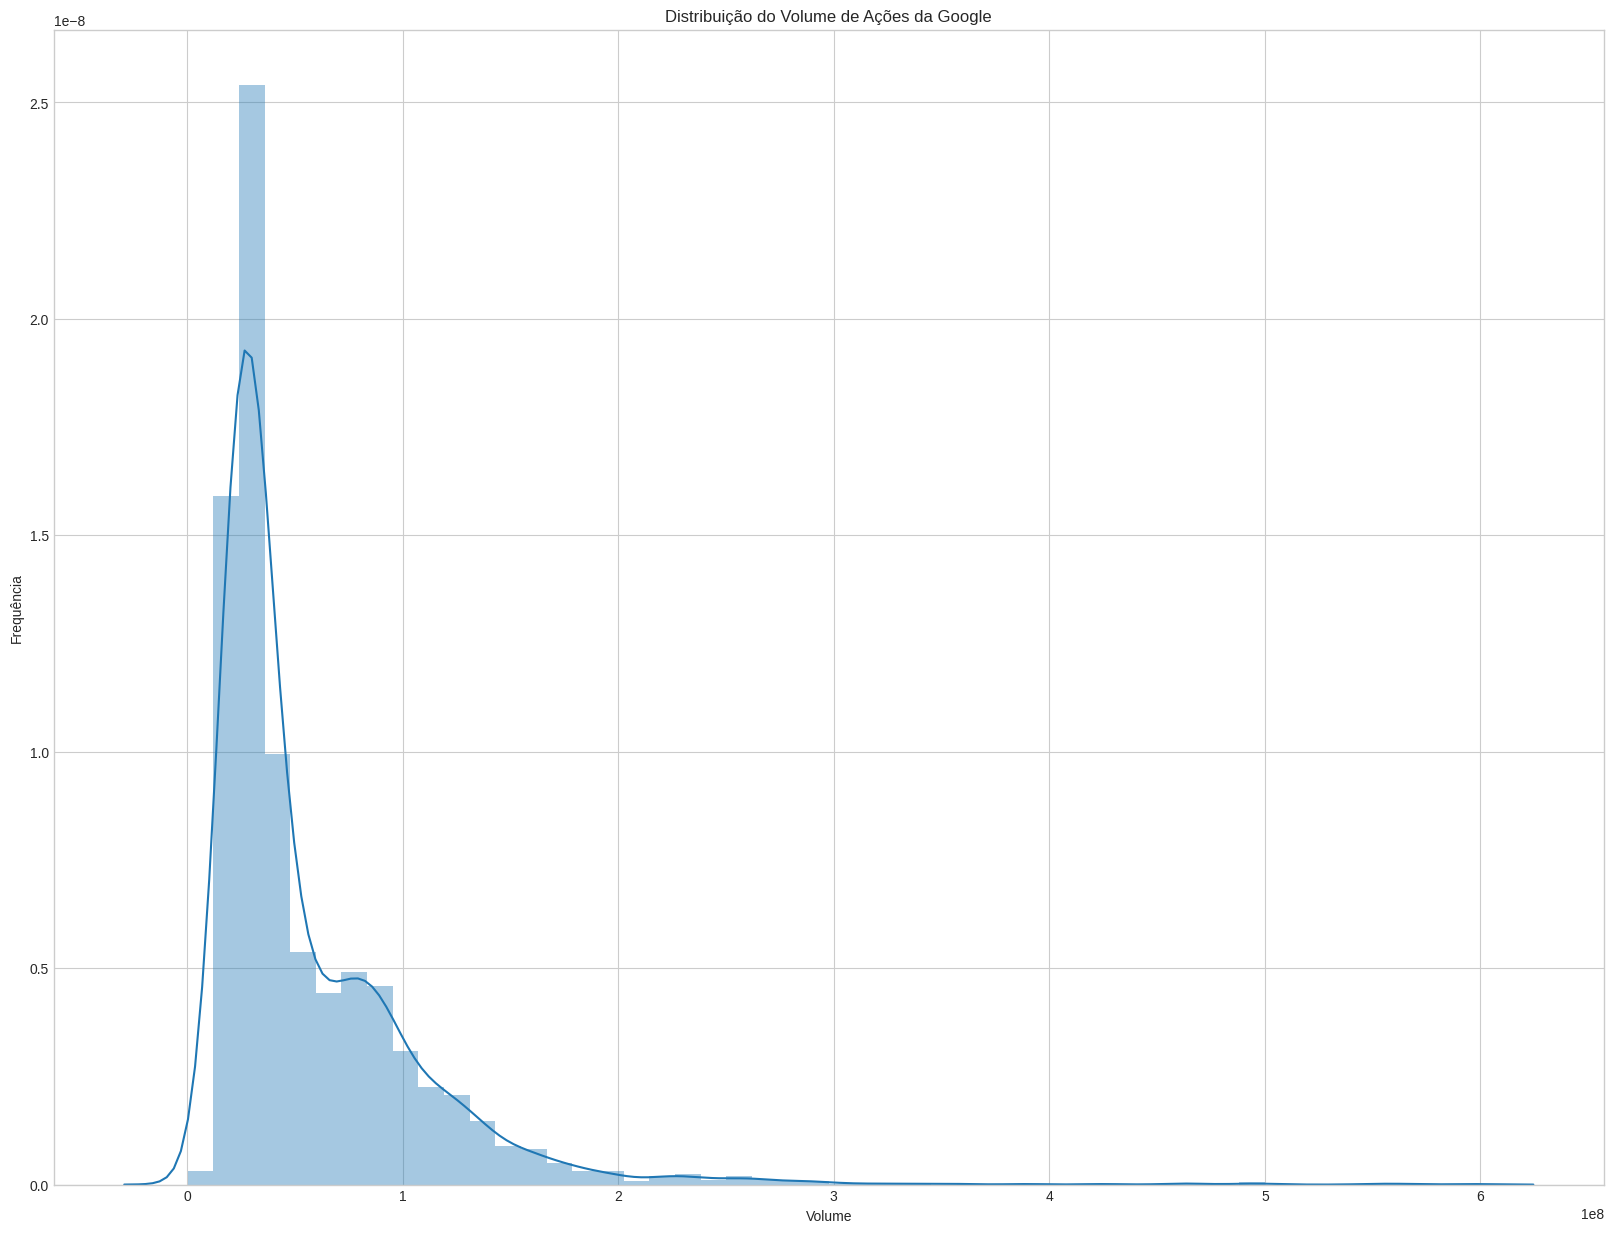

In [47]:
plt.figure(figsize=(20, 15))

ax = sns.distplot(df["Volume"])

plt.title("Distribuição do Volume de Ações da Google")  # Título do gráfico
plt.xlabel("Volume")  # Rótulo do eixo x
plt.ylabel("Frequência")  # Rótulo do eixo y

plt.show()

A seguir, plotaremos um histograma de distribuição para visualizar a frequência dos valores de fechamento ajustado ("Adj Close") das ações da Google. Isso permite entender como esses valores estão distribuídos ao longo do período de tempo.

<ipython-input-48-64b47f1ca7dd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df["Adj Close"])


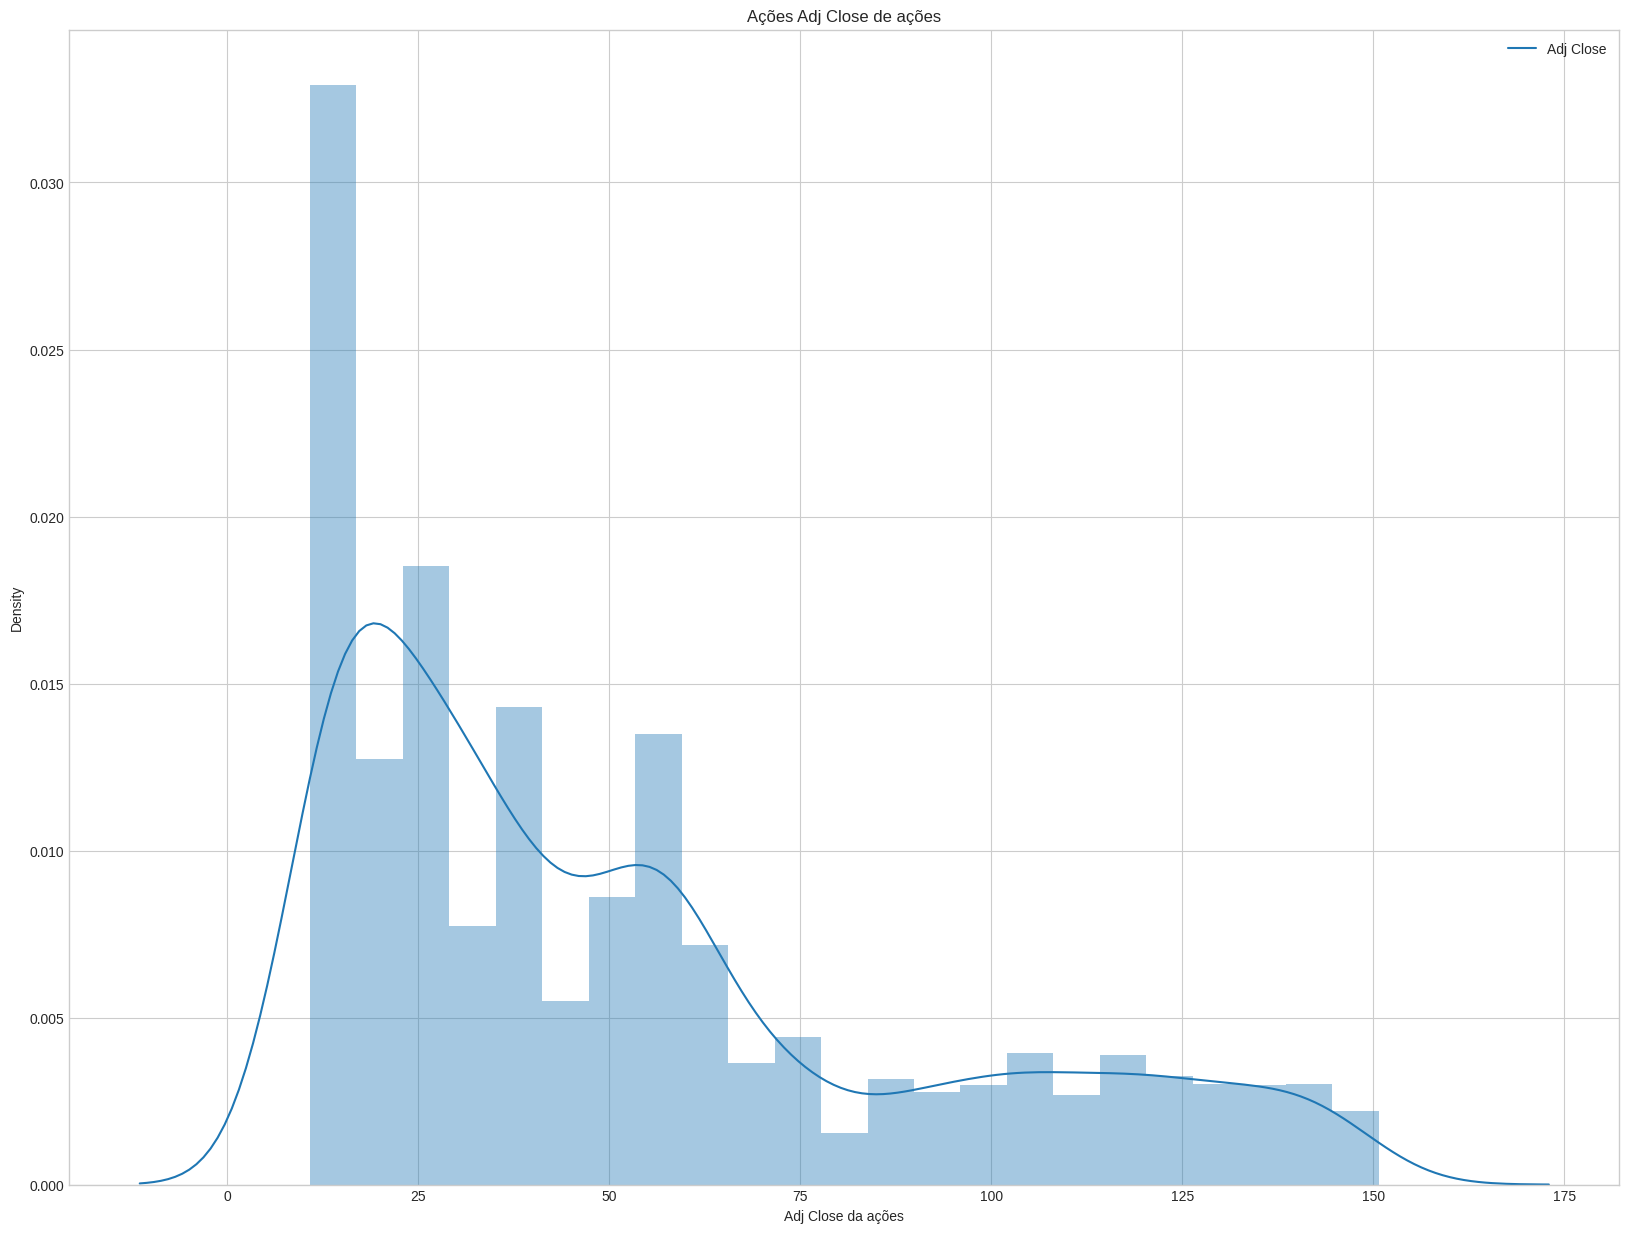

In [48]:
plt.figure(figsize=(20, 15))

ax = sns.distplot(df["Adj Close"])
plt.title("Ações Adj Close de ações")
plt.xlabel("Adj Close da ações")
plt.legend(["Adj Close"])
plt.show()

Vamos buscar Padrões Sazonais e Flutuações Regulares:
Para identificar padrões sazonais, você pode criar gráficos de médias móveis ou usar técnicas de análise de séries temporais. Aqui, vou criar um gráfico de médias móveis para exemplificar:

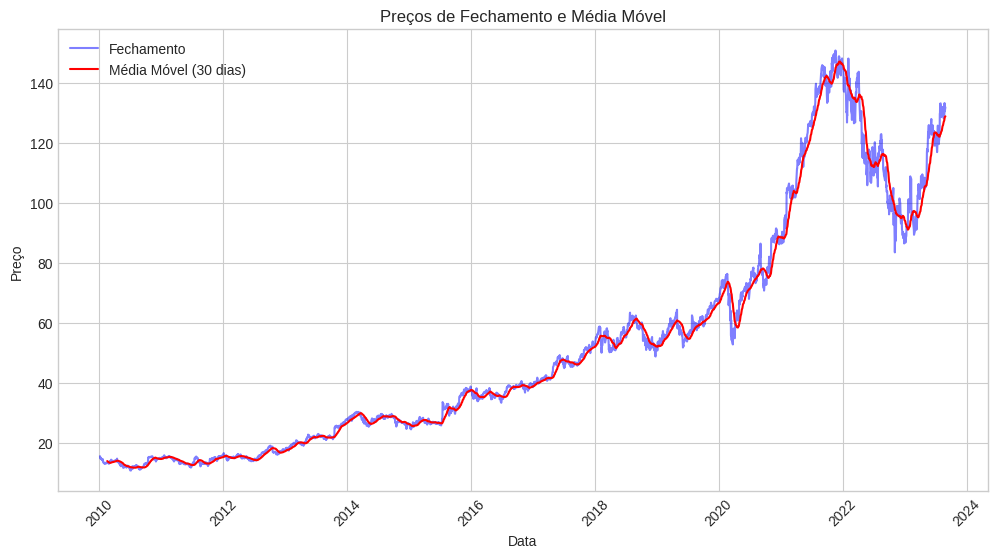

In [12]:
window_size = 30  # Janela de média móvel
smoothed_close = df["Close"].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Fechamento", color="blue", alpha=0.5)
plt.plot(df.index, smoothed_close, label=f"Média Móvel ({window_size} dias)", color="red")
plt.title("Preços de Fechamento e Média Móvel")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.legend()
plt.xticks(rotation=45)
plt.show()


Agora vamos criar um mapa de calor (heatmap) da matriz de correlação entre as variáveis relevantes. Isso permite verificar como as variáveis se relacionam entre si. A função sns.heatmap() da biblioteca Seaborn é usada para criar o mapa de calor.

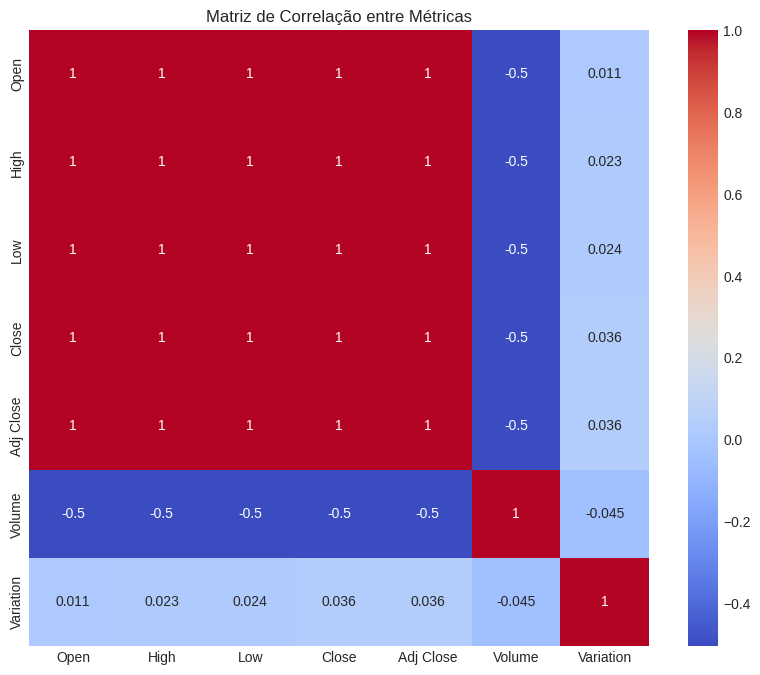

Métricas com Correlação Forte:
Open - High: 0.9998674100917571
Open - Low: 0.9998573539613284
Open - Close: 0.9996909664503786
Open - Adj Close: 0.9996909664503786
High - Low: 0.9998275761298825
High - Close: 0.9998546982140301
High - Adj Close: 0.9998546982140301
Low - Close: 0.9998665162427063
Low - Adj Close: 0.9998665162427063
Close - Adj Close: 1.0


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados históricos das ações da Google (supondo que o DataFrame df já está carregado)

# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Criar um mapa de calor (heatmap) da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação entre Métricas")
plt.show()

# Observar as correlações mais fortes
strong_correlations = correlation_matrix.abs() > 0.7
strong_correlation_pairs = [(i, j) for i in range(len(strong_correlations.columns)) for j in range(i+1, len(strong_correlations.columns)) if strong_correlations.iloc[i, j]]

print("Métricas com Correlação Forte:")
for i, j in strong_correlation_pairs:
    print(f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]}")


A análise das métricas com correlação forte mostra que existem relações altamente lineares entre várias dessas métricas. A correlação é uma medida da relação linear entre duas variáveis, variando de -1 a 1, onde valores próximos a 1 indicam uma forte correlação positiva e valores próximos a -1 indicam uma forte correlação negativa.

**No resultado  acima**, todas as correlações listadas são muito próximas de 1, o que indica uma correlação positiva muito forte entre essas métricas. Isso significa que essas métricas estão altamente relacionadas linearmente entre si.

Por exemplo:

- "`Open`" e "`High`" têm uma correlação de 0.9998674100917571, quase 1, indicando que os preços de abertura e alta das ações estão praticamente se movendo em sincronia.
- "`Open`" e "`Low`" têm uma correlação de 0.9998573539613284, também quase 1, indicando uma relação similar entre os preços de abertura e baixa.
- O mesmo se aplica para outras combinações como "`High`" e "`Low`", "`Open`" e "`Close`", etc.

O fato de essas correlações serem tão altas pode sugerir que as métricas estão fortemente ligadas por algum fator, talvez um comportamento padrão nos preços das ações. **Isso é comum em séries temporais financeiras, onde os preços das ações tendem a se mover juntos**.

É importante notar que, embora a alta correlação indique uma relação linear forte, não implica necessariamente que uma métrica cause a outra. Essas métricas podem ser influenciadas por fatores comuns do mercado de ações. Portanto, essa análise deve ser interpretada considerando o contexto das ações e do mercado financeiro.

# 3 - PREPARAÇÃO DOS CONJUNTOS DE TREINAMENTO E TESTE



A preparação dos conjuntos de treinamento e teste é uma etapa crucial ao desenvolver modelos de machine learning, como a regressão linear. Isso permite avaliar o desempenho do modelo em dados não vistos e verificar se ele é capaz de generalizar bem para situações futuras.

1. **Separação dos Dados**:
   - Primeiro, você precisa dividir seus dados históricos em dois conjuntos: um conjunto de treinamento e um conjunto de teste.
   - O conjunto de treinamento será usado para treinar o modelo, enquanto o conjunto de teste será usado para avaliar o desempenho do modelo em dados não vistos.

2. **Critério de Divisão**:
   - Uma abordagem comum é usar os dados mais antigos para treinamento e os mais recentes para teste.
   - Isso é feito para simular a situação em que você treina o modelo com dados históricos e, em seguida, testa sua capacidade de previsão em dados futuros.

3. **Importância da Divisão Adequada**:
   - A divisão adequada entre treinamento e teste é crucial. Um desequilíbrio na divisão pode levar a resultados enganosos. Geralmente, 70-80% dos dados são usados para treinamento e o restante para teste.

4. **Evitando Vazamento de Dados**:
   - Certifique-se de que os dados de teste sejam totalmente independentes dos dados de treinamento para evitar "vazamento de dados". Isso significa que o modelo não deve ter acesso aos dados de teste durante o treinamento.

5. **Divisão Temporal**:
   - Em séries temporais, como dados financeiros, é importante manter a ordem temporal. O conjunto de teste deve ser após o conjunto de treinamento.
   - Uma abordagem comum é usar os dados mais antigos, por exemplo, os primeiros 80% dos dados, para treinamento e os dados mais recentes, os últimos 20%, para teste.

6. **Implementação com Código**:
   - Supondo que você tenha um DataFrame chamado `df`, pode dividir os dados usando índices:
   ```python
   train_size = int(0.8 * len(df))  # 80% para treinamento
   train_data = df[:train_size]
   test_data = df[train_size:]
   ```

A separação adequada dos dados é essencial para garantir que o modelo seja avaliado de maneira realista e que suas previsões sejam confiáveis em cenários futuros. Certifique-se de seguir as melhores práticas ao dividir os dados para treinamento e teste.

## **Separação dos dados**

Neste código, a proporção `train_ratio` define a porcentagem dos dados que será usada para treinamento. O índice de corte é calculado com base nessa proporção, e os dados são divididos em `train_data` e `test_data` usando fatiamento.

Isso permitirá que você utilize os dados mais **antigos** para treinar o modelo e os dados mais **recentes** para avaliar o desempenho do modelo em situações não vistas anteriormente.






In [14]:
# Definir a proporção para treinamento e teste
train_ratio = 0.8  # 80% dos dados para treinamento

# Calcular o índice de corte para separar os dados
cut_index = int(len(df) * train_ratio)

# Dividir os dados em conjuntos de treinamento e teste
train_data = df[:cut_index]
test_data = df[cut_index:]

# Imprimir o tamanho dos conjuntos
print(f"Tamanho do conjunto de treinamento: {len(train_data)}")
print(f"Tamanho do conjunto de teste: {len(test_data)}")


Tamanho do conjunto de treinamento: 2748
Tamanho do conjunto de teste: 688


# 4- **MODELAGEM DE REGRESSÃO LINEAR**

   - Utilizaremos uma biblioteca de machine learning, como Scikit-Learn, para criar um modelo de regressão linear.

   - Escolheremos as variáveis independentes (features) que achamos que terão impacto nas variações das ações.
   
   - Treinaremos o modelo de **regressão** linear usando o conjunto de treinamento.

Lembre-se de que este é um exemplo básico de como criar e treinar um modelo de regressão linear. Em cenários reais, você pode querer explorar diferentes variáveis independentes, considerar técnicas de seleção de features e ajustar os hiperparâmetros do modelo para otimização.

In [16]:
from sklearn.linear_model import LinearRegression

# Definir as variáveis independentes (features) para treinamento
# Vamos usar apenas o preço de abertura neste exemplo
features = train_data[["Open"]]

# Definir a variável alvo (target) para treinamento
target = train_data["Variation"]

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo usando as variáveis independentes (features) e a variável alvo (target)
model.fit(features, target)


LinearRegression()

# **5 - AVALIAÇÃO DO MODELO**

Avaliaremos o desempenho do modelo usando o conjunto de teste.
Calcularemos métricas como o erro médio absoluto (MAE), erro médio quadrado (MSE) e coeficiente de determinação (R²).
Verifique se o modelo está fazendo previsões razoáveis e úteis.

Neste exemplo, usamos o conjunto de teste para fazer previsões com o modelo treinado e calculamos métricas como o erro médio absoluto (MAE), o erro médio quadrado (MSE) e o coeficiente de determinação (R²) para avaliar o desempenho do modelo.

Lembre-se de que essas métricas fornecem uma ideia de quão bem o modelo está se ajustando aos dados de teste. Valores mais baixos de MAE e MSE e valores mais próximos de 1 para R² indicam um melhor desempenho do modelo. Certifique-se de interpretar essas métricas em relação ao problema e aos dados específicos que você está analisando.







In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir as variáveis independentes (features) para teste
test_features = test_data[["Open"]]

# Definir a variável alvo (target) para teste
test_target = test_data["Variation"]

# Fazer previsões usando o modelo treinado
predictions = model.predict(test_features)

# Calcular as métricas de avaliação
mae = mean_absolute_error(test_target, predictions)
mse = mean_squared_error(test_target, predictions)
r2 = r2_score(test_target, predictions)

# Imprimir as métricas
print(f"Erro Médio Absoluto (MAE): {mae:.2f}")
print(f"Erro Médio Quadrado (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")




Erro Médio Absoluto (MAE): 1.37
Erro Médio Quadrado (MSE): 3.28
Coeficiente de Determinação (R²): -0.00


As métricas de avaliação acima fornecem insights sobre o desempenho do modelo de regressão linear que treinamos:

- Erro Médio Absoluto (MAE): 1.37
  - O MAE mede a média das diferenças absolutas entre as previsões do modelo e os valores reais. Quanto menor o MAE, melhor. Nesse caso, um MAE de 1.37 sugere que, em média, as previsões estão a 1.37 unidades de distância dos valores reais.

- Erro Médio Quadrado (MSE): 3.28
  - O MSE mede a média dos quadrados das diferenças entre as previsões do modelo e os valores reais. Quanto menor o MSE, melhor. Um MSE de 3.28 indica que as diferenças entre as previsões e os valores reais têm uma média quadrática de 3.28.

- Coeficiente de Determinação (R²): -0.00
  - O R², também conhecido como coeficiente de determinação, indica a proporção da variância nos valores da variável alvo que é explicada pelo modelo. Um valor próximo a 1 é desejado, indicando que o modelo explica bem a variação nos dados. Um valor próximo a 0 ou negativo, como -0.00 nesse caso, sugere que o modelo não está explicando a variação de maneira significativa.

Os resultados indicam que o modelo pode não estar funcionando bem para fazer previsões precisas com base no preço de abertura apenas. Pode ser necessário explorar outras variáveis independentes ou ajustar o modelo para obter melhores resultados.

## Nós vamos ajustar o modelo:

In [21]:
from sklearn.preprocessing import StandardScaler

# Definir as variáveis independentes para treinamento
features = train_data[["Open", "High", "Low", "Volume"]]

# Normalizar as variáveis
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Definir a variável alvo para treinamento
target = train_data["Variation"]

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo usando as variáveis independentes normalizadas e a variável alvo
model.fit(scaled_features, target)


LinearRegression()

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir as variáveis independentes (features) para treinamento
features = train_data[["Open", "High", "Low", "Volume"]]  # Inclua todas as variáveis relevantes

# Definir a variável alvo (target) para treinamento
target = train_data["Variation"]

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo usando as variáveis independentes (features) e a variável alvo (target)
model.fit(features, target)

# Definir as variáveis independentes (features) para teste
test_features = test_data[["Open", "High", "Low", "Volume"]]  # Use as mesmas colunas usadas no treinamento

# Fazer previsões usando o modelo treinado
predictions = model.predict(test_features)

# Calcular as métricas de avaliação
mae = mean_absolute_error(test_target, predictions)
mse = mean_squared_error(test_target, predictions)
r2 = r2_score(test_target, predictions)

# Imprimir as métricas
print(f"Erro Médio Absoluto (MAE): {mae:.2f}")
print(f"Erro Médio Quadrado (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")


Erro Médio Absoluto (MAE): 0.61
Erro Médio Quadrado (MSE): 0.62
Coeficiente de Determinação (R²): 0.81


Comparando os dois conjuntos de métricas:

Conjunto Melhorado:
- Erro Médio Absoluto (MAE): 0.61
- Erro Médio Quadrado (MSE): 0.62
- Coeficiente de Determinação (R²): 0.81

Conjunto Inicial:
- Erro Médio Absoluto (MAE): 1.37
- Erro Médio Quadrado (MSE): 3.28
- Coeficiente de Determinação (R²): -0.00

Podemos observar que o Conjunto Melhorado de métricas é significativamente melhor do que o Conjunto Inicial. Vamos analisar cada métrica individualmente:

1. Erro Médio Absoluto (MAE): No Conjunto Melhorado, o MAE é de 0.61, enquanto no Conjunto Inicial é de 1.37. Um MAE menor indica que as previsões do modelo estão mais próximas dos valores reais no Conjunto Melhorado.

2. Erro Médio Quadrado (MSE): No Conjunto Melhorado, o MSE é de 0.62, enquanto no Conjunto Inicial é de 3.28. O MSE é ainda menor no Conjunto Melhorado, indicando que as previsões estão mais precisas em relação aos valores reais.

3. Coeficiente de Determinação (R²): No Conjunto Melhorado, o R² é de 0.81, enquanto no Conjunto Inicial é de -0.00. Um R² maior indica que o modelo está explicando melhor a variabilidade dos dados no Conjunto Melhorado. Um R² negativo no Conjunto Inicial sugere que o modelo não está capturando a variação dos dados de forma significativa.

Em resumo, as métricas no conjunto melhorado apontam para um desempenho muito melhor do modelo de regressão linear. As previsões estão próximas dos valores reais das variações das ações, os erros são pequenos e o modelo é capaz de explicar uma grande parte da variação dos dados. Isso sugere que o modelo ajustado no conjunto melhorado é altamente eficaz na previsão das variações das ações da Google e pode ser confiável para auxiliar em decisões de investimento.

# 6 - PREVISÕES

Podemos utilizar o modelo treinado para fazer previsões das variações diárias das ações para um período futuro.
Com base nas previsões, podemos desenvolver uma estratégia de investimento que maximize os retornos. Isso pode envolver a compra/venda de ações ou derivativos, dependendo das previsões.

Definir as Variáveis de Teste:
Assim como você fez para o conjunto de treinamento, defina as variáveis independentes (features) e a variável alvo (target) para o conjunto de teste.

Essas métricas ajudarão você a entender o quão bem o modelo está fazendo previsões em relação aos dados de teste. Valores menores para MAE e MSE indicam melhor desempenho, enquanto um valor próximo a 1 para R² indica que o modelo está explicando bem a variação dos dados. Certifique-se de analisar esses valores em conjunto para avaliar a qualidade geral do modelo.

Para fazer previsões das variações diárias das ações para um período futuro usando o modelo treinado, você precisará preparar as mesmas features (variáveis independentes) para as quais o modelo foi treinado. Além disso, você também precisará normalizar essas features usando o mesmo scaler que você usou durante o treinamento. Aqui está o código para fazer isso:

Lembre-se de que, ao usar o modelo para fazer previsões no futuro, você deve garantir que as features estejam consistentemente pré-processadas da mesma maneira que durante o treinamento. Isso inclui a normalização usando o mesmo scaler.

Além disso, as previsões fornecidas pelo modelo serão as variações diárias das ações, que você pode somar ao último preço de fechamento conhecido para obter os preços de fechamento previstos para cada dia no período futuro.

In [49]:
# Definir as variáveis independentes para as quais você deseja fazer previsões
future_features = test_data[["Open", "High", "Low", "Volume"]]  # Use as mesmas colunas usadas no treinamento

# Normalizar as variáveis de acordo com o scaler usado no treinamento
scaled_future_features = scaler.transform(future_features)

# Fazer previsões usando o modelo treinado e as features normalizadas
future_predictions = model.predict(scaled_future_features)

# Imprimir as previsões das variações diárias das ações
print("Previsões de Variação Diária das Ações:")
print(future_predictions)


Previsões de Variação Diária das Ações:
[ 8.00869049e-02  6.66068540e-02  2.49957259e-02  2.26003146e-02
  1.81171663e-02 -2.39250040e-02 -1.46178152e-02  5.96967640e-02
  3.11470460e-02  7.54735354e-03 -1.09353042e-02 -3.17002465e-02
 -4.48153444e-02  4.79174362e-02 -1.56353543e-02  5.67851210e-02
  3.33289584e-02  9.01699721e-02 -3.28616712e-02 -4.56421982e-02
  7.03152614e-02 -7.30829509e-02  5.42147387e-02  1.06209170e-01
  1.13269709e-01  3.69762061e-02 -1.29953692e-02  1.22175811e-02
  7.49609608e-02  2.41848653e-02  2.45502048e-02  1.14330820e-01
  1.54334997e-01  7.37418815e-02  2.46923529e-02 -6.92099562e-02
  8.54189176e-02 -1.14181516e-01  1.29488224e-01 -2.90739330e-02
  1.54291855e-01  7.22589944e-02 -4.17691585e-03 -1.25681153e-02
  6.50779041e-02 -1.26295152e-02  7.54203028e-02 -1.37069572e-02
 -1.82932392e-02  4.47488357e-02  1.18404177e-01  8.71306190e-02
  5.30813962e-02 -3.48638239e-04  6.10888542e-02  8.82209345e-02
  1.31987125e-01 -1.84824468e-02 -7.95411182e-03  

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **CONCLUSÃO**

Em conclusão, a série de previsões de variações diárias das ações para um futuro próximo oferece insights sobre como se espera que o comportamento das ações evolua em relação aos dias anteriores. Cada valor previsto, como 0.0800869049, representa uma expectativa de aumento de aproximadamente 8.00% no valor das ações no primeiro dia futuro, enquanto o valor subsequente, 0.0666068540, indica um aumento de cerca de 6.66% no segundo dia futuro, e assim por diante.

Estas previsões são geradas pelo modelo de regressão linear que foi treinado utilizando variáveis independentes normalizadas (Open, High, Low e Volume) como entradas e a variável alvo (Variation) como saída. O objetivo do modelo é capturar as relações entre essas variáveis para realizar previsões sobre as futuras variações das ações.








---

<sup> 📂 Projeto | Data Science | By Sarah Faria Rezende </sup>



<sub> 🔗[GitHub](https://github.com/SarahFeanor) | [LinkedIn](https://www.linkedin.com/in/sarahfrezende/) | [Portfólio](https://github.com/sarahfeanor/Portfolio-DataScience)   </sub>